# This notebook simulates the voting mechanism

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
outputs=torch.load('pred/outputs.pt').numpy()
targets=torch.load('pred/targets.pt').numpy()
paths=pd.read_csv('pred/paths.csv')
path=[s.split('\\')[-1] for s in paths['0']]
meta=pd.read_csv('pred/val_meta.csv')

In [7]:
preds=np.zeros((1000,7))
label=np.zeros(1000)
idx=0
for i in range(146):
    rows=meta[meta['no']==i]
    if rows.shape[0]==0:
        continue
    if rows.shape[0]> 1:
        acc=np.zeros((1,7))
        count=0
        for r in rows.index:
            acc+=(outputs[r])*(meta['prob'][r]*(0.5**count))
            count+=1
        acc=acc/len(rows.index)
        preds[idx]=acc
        label[idx]=targets[r]
        idx+=1
    else:
        preds[idx]=outputs[rows.index[0]]
        label[idx]=targets[rows.index[0]]
        idx+=1
        
preds=preds[:idx]
label=label[:idx]

In [8]:
classes = ('angry', 'disgust', 'fear', 'happy', 'natural', 'sad', 'surprise')
pred_label=np.argmax(preds,axis=1)
print(classification_report(label,pred_label,digits=4,target_names=classes))

              precision    recall  f1-score   support

       angry     0.6667    0.7000    0.6829        20
     disgust     0.5294    0.5625    0.5455        16
        fear     0.6190    0.5909    0.6047        22
       happy     0.7143    0.5263    0.6061        19
     natural     0.4706    0.3636    0.4103        22
         sad     0.5000    0.5500    0.5238        20
    surprise     0.3793    0.5000    0.4314        22

    accuracy                         0.5390       141
   macro avg     0.5542    0.5419    0.5435       141
weighted avg     0.5510    0.5390    0.5404       141



In [9]:
cm=confusion_matrix(label,pred_label)

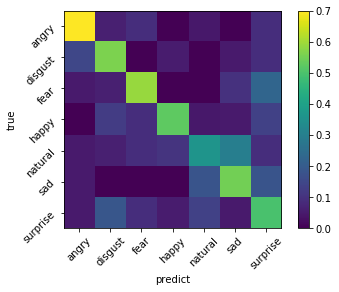

In [6]:
classes = ('angry', 'disgust', 'fear', 'happy', 'natural', 'sad', 'surprise')
plt.imshow(cm/np.sum(cm,axis=1))
plt.xlabel('predict')
plt.ylabel('true')
plt.xticks(np.arange(7), classes)
plt.xticks(rotation=45)
plt.yticks(np.arange(7), classes)
plt.yticks(rotation=45)
plt.colorbar()
plt.savefig('figures/performance_recall.eps', format='eps')
plt.show()